# P1. Test a Perceptual Phenomenon

## Introduction

This project analyses statistics of an experiment, which is exploring the so-called [Stroop Effect](https://en.wikipedia.org/wiki/Stroop_effect).

In this experiment, those participating are presented with a sequence of colored words. The subject must read aloud **the color of ink** of each word (not the word itself!) The resulting time to read all the words is measured as "reaction time"

There are two setups: "congruent" and "incongruent" (different "stimuli types"). In the first one the words themselves and their color matches, in the second they differ:

![](img/stroop_experiment.png)


Stroop's findings are that **incongruent case usually results in longer reaction times** (i.e. it's "harder" to correctly say aloud the word's color when the word itself names a non-matching color). There are different theories that are trying to explain this phenomenon, both in cognitive psychology and neuroscience.   

## Question 1 

*What is our independent variable? What is our dependent variable?*

**Answer**: 

Independent variable in our case is the *stimuli type*. 

It can be either *congruent* (whereas the color of ink matches the word) or *incongruent* (color of the ink does not correspond to the word). So the variable is binary, i.e. it has two possible values. Apparently, the original Stroop test was also taking into account a third stimuli type, which is a "neutral" one, but we are ignoring it in our experiment.

We manipulate this variable in order to observe the result of its change on the *reaction time* (time it takes to name the color of ink aloud).

Therefore, *reaction time* is the dependent variable.

There is also a bunch of lurking variables, one example is whether the person in question is a native English speaker or not. In a case such as mine (English being not my first language), arguably the brain's color/language processing paths may be offset related to what the original Stroop's research was presuming. Also, a person may be color-blind, tired, illiterate (due to an age) or specifically trained to block certain stimuli types effectively.

Granted, there is no additional information available about the specifics of the actual sample data provided in the .csv file.

## Question 2

*What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.*

**Answer**: 

Since we already know what exactly kind of effect we are trying to confirm (or not), namely that incongruent reaction times are expected to be *greater* according to Stroop findings, we go with a single-tailed hypothesis setup.

Hypotheses:
$$ H_0:  \mu_i \le \mu_c $$
$$ H_A:  \mu_i > \mu_c $$
where:
*  $\mu_i$ is average reaction time in the incongruent case
*  $\mu_c$ is average reaction time in the congruent case

Therefore, the hypotheses set could be reworded as: 
*  $H_0$ assumes that reaction time in the congruent case is lower or equal to the incongruent case. To put differently: when the color of ink and the word itself *do* match then it will take the same time (or more) to read the words than if they did not match.
*  $H_A$ assumes that it takes noticeably more time to read the words in the incongruent case

The statistical test we are going to perform is the *Student's dependent t-test for paired samples*, due to the following reasons:
*  We don't know the population paramters, so z-test is not possible
*  The samples are paired (dependent), since based on the data we have, the same subject is first subjected to a first part of the experiment (congruent), following with the second part (incongruent)

The latter means that we can rewrite our hypotheses as:
$$ H_0:  \mu_i - \mu_c \le 0 $$
$$ H_A:  \mu_i - \mu_c > 0 $$

and work with the time difference for each subject instead of the two separate times.

## Question 3

*Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.*

**Answer**: 

Let's read the data first from the provided .csv file:

In [1]:
import csv
import pandas as pd

stroop_data = pd.read_csv('data/stroopdata.csv')
stroop_data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Congruent,12.079,16.791,9.564,8.630,14.669,12.238,14.692,8.987,9.401,14.480,...,18.200,12.130,18.495,10.639,11.344,12.369,12.944,14.233,19.710,16.004
Incongruent,19.278,18.741,21.214,15.687,22.803,20.878,24.572,17.394,20.762,26.282,...,35.255,22.158,25.139,20.429,17.425,34.288,23.894,17.960,22.058,21.157


Now, we build a table with descriptive statistics:

In [2]:
import numpy as np
from scipy.stats import trim_mean

stats = [
    # central tendency:
    ["Mean", np.mean], ["Median", np.median], ["Trimmed mean (10%)", lambda x: trim_mean(x, .1)[0]], 
    # variability:
    ["Standard deviation", np.std], ["Variance", np.var],
    ["First quartile", np.percentile, 25], ["Third quartile", np.percentile, 75],
    ["Interquartile range", lambda x: np.percentile(x, 75) - np.percentile(x, 25)],
    ["5% percentile", np.percentile, 5], ["95% percentile", np.percentile, 95],
    # other:
    ["Min", np.amin], ["Max", np.amax]]

def gather_stats(col):
    return map(lambda desc: desc[1](col.as_matrix(), *desc[2:]), stats)

pd.DataFrame([gather_stats(stroop_data.ix[:,0:1]), gather_stats(stroop_data.ix[:,1:2])], 
             index = stroop_data.columns, columns = map(lambda x: x[0], stats))

,Mean,Median,Trimmed mean (10%),Standard deviation,Variance,First quartile,Third quartile,Interquartile range,5% percentile,95% percentile,Min,Max
Congruent,14.051125,14.3565,13.8786,3.484416,12.141153,11.89525,16.20075,4.30550,9.04910,19.52775,8.630,22.328
Incongruent,22.015917,21.0175,21.2879,4.696055,22.052934,18.71675,24.05150,5.33475,17.39865,33.08710,15.687,35.255


Note that above could also be done (more neatly) via pandas "describe":

In [3]:
stroop_data.describe([.05, .25, .5, .75, .95]).transpose()

,count,mean,std,min,5%,25%,50%,75%,95%,max
Congruent,24.0,14.051125,3.559358,8.630,9.04910,11.89525,14.3565,16.20075,19.52775,22.328
Incongruent,24.0,22.015917,4.797057,15.687,17.39865,18.71675,21.0175,24.05150,33.08710,35.255


In this case, however, we have less control over the way the statistics computed. For example, standard deviation is computed by default for the *population*, not sample (i.e. it uses the Bessel's correction by default).

## Question 4

*Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.*

**Answer**: 

Let's start from the [box-and-whisker](https://en.wikipedia.org/wiki/Box_plot) plot, which can be thought of as a way to visualize some of the above descriptive statistics:

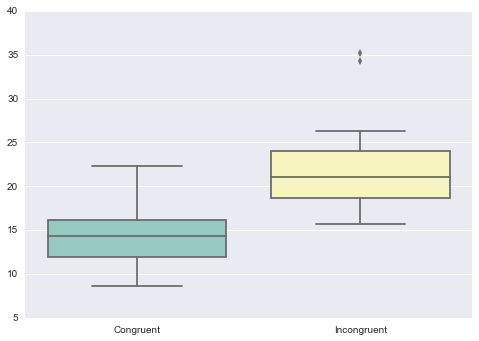

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid", palette="Set3")

sns.boxplot(data=stroop_data)

Some observations from the plot:
*  Incongruent case shows observably higher reaction times, that seems to intuitively support our $H_A$ hypothesis  
*  There are a couple of outliers in the incongruent case (very high reaction times)
*  The variability is somewhat higher for the congruent case (save for the outliers)
*  But the sample size is too small, so statements like above are not very meaningful 

Now, let's display what is called a "violin plot". It also shows the relative quartile placement, and in addition displays distributions of both congruent/incongruent variables via [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation):

[<matplotlib.text.Text at 0xa2c4828>, <matplotlib.text.Text at 0xa2b9080>]

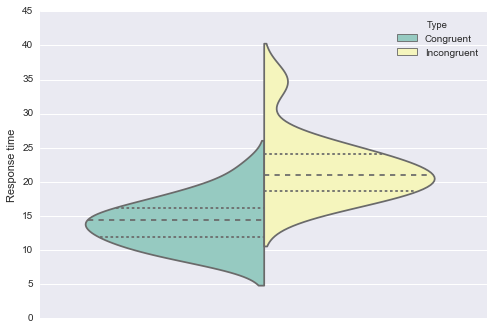

In [5]:
sd = pd.melt(stroop_data, value_vars=['Congruent', 'Incongruent'], 
             var_name="Type")
sd['all'] = ''
ax = sns.violinplot(x='all', y='value', hue='Type', data=sd, 
               split=True, inner="quart")
ax.set(xlabel='', ylabel='Response time')

Here, once again, we can see that interquartile ranges do not even overlap, and incongruent one lies above the congruent.

The distributions look like normal ones, non-skewed (aside from a couple of outliers causing a slight tail in the incongruent case) and unimodal.

Since the number of data points is so small, the raw sample placement could be also illustrated via a so-called ["bee swarm plot"](http://www.cbs.dtu.dk/~eklund/beeswarm/):

[<matplotlib.text.Text at 0xa372fd0>, <matplotlib.text.Text at 0xa2c40f0>]

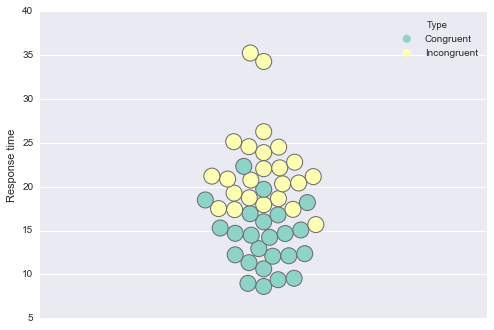

In [6]:
ax = sns.swarmplot(x='all', y='value', hue='Type', data=sd, 
              size=16, edgecolor="gray", linewidth=1)
ax.set(xlabel='', ylabel='Response time')

The incongruent times here are clearly above the congruent ones.

The next one is a stacked bar plot for the reaction times, sorted by the congruent ones:

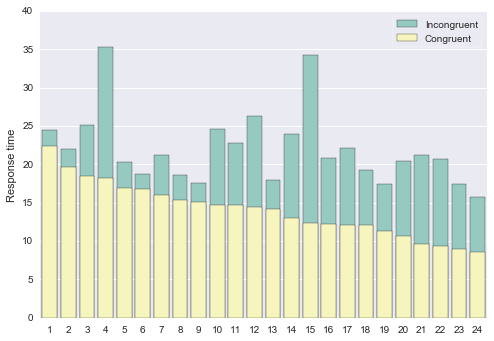

In [7]:
sd1 = stroop_data.sort_values("Congruent", ascending=False)
sd1['idx'] = range(1, len(sd1) + 1)
f, ax = plt.subplots()
cp = sns.color_palette()
sns.barplot(x="idx", y="Incongruent", label="Incongruent", data=sd1, color=cp[0])
sns.barplot(x="idx", y="Congruent", label="Congruent", data=sd1, color=cp[1])
ax.set(xlabel='', ylabel='Response time')
ax.legend(ncol=1, loc="upper right", frameon=True)

This one clearly show that incongruent time was higher for *every respondent*. 

Note that all the plots before this one were treating congruent and incongruent samples as completely independent, whereas in fact for each row, presumably, both congruent and incongruent response times were collected from the same person.

In this light, the next plot is a joint one, to show the possible dependency between samples:

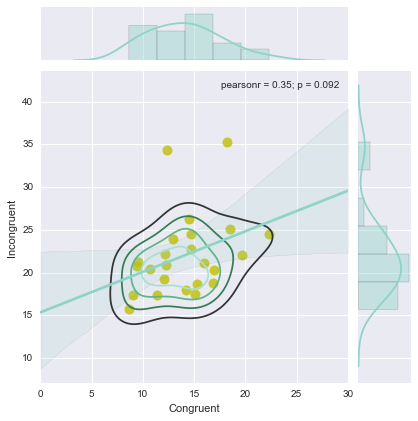

In [8]:
ax = sns.jointplot("Congruent", "Incongruent", data=stroop_data, 
                   kind="reg", scatter_kws=dict(s=100, color="y"))
ax.plot_joint(sns.kdeplot, n_levels=5)

Judging by the look of the scatterplot, bivariate density plot and the attempted linear regression margins, there does not seem to be much dependency between the two variables.

## Question 5 

*Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?*

**Answer**: 

We'll first compute the differences between incongruent and congruent times for each subject and find the mean and standard error for them: 

In [9]:
import math

diff = stroop_data["Incongruent"] - stroop_data["Congruent"]

muD = diff.mean()
SD = diff.std(ddof = 1) # to compute sample standard deviation

n = len(diff)
df = n - 1
tstat = muD/(SD/math.sqrt(n))

muD, SD, tstat

(7.964791666666667, 4.864826910359056, 8.020706944109957)

Point estimate of difference of means: $ \mu_D = \mu_i - \mu_c = 7.965 $  
Standard deviation for difference: $S_D = 4.865$  
t-statistic: $t=8.021$

With a 99% confidence level ($\alpha=0.01$, single-tailed hypothesis), let's find the t-critical value:

In [10]:
from scipy.stats import t

alpha = 0.01
tc = t.ppf(1.0 - alpha, df)
tc

2.4998667394943976

The t-critical value $t_c=2.5$  

We see that our t-statistic is significantly larger than the t-critical value, $t>t_c$ (since 8.021 > 2.5)  

Therefore, we **reject the null hypothesis**, which means that incongruent colors scenario is expected to take significantly more time that the congruent one.

This does confirm the expectations, based on both the actual Stroop's research, the plots above and my own experience when performing the test. 

## Question 6

*Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!*

**Answer**:

The [Wikipedia article](https://en.wikipedia.org/wiki/Stroop_effect) suggests that the reason is that linguistic processing channels of the brain are faster than the color ones, so the *word* stimuli occur faster than the *color* ones.

This makes sense, I believe. Additionally, I think there must be some kind of cognitive dissonance effect. The brain gets "surprised" at the mismatch between the word and the color (possibly, there is no fresh axonal inhibition path between the neurons, or whatever), and it takes additional time for it, since it has to work it around without a "shortcut" ready.

The latter explanation is more general, and does not necessarily involve the "linguistic processing channels". 

To illustrate this, here's a similar experiment I've come up with: name the *actual number of digits*

![](img/alternative-experiment.png)



## Resources

*  Stroop effect: https://en.wikipedia.org/wiki/Stroop_effect
*  Box plot: https://en.wikipedia.org/wiki/Box_plot
*  Kernel density estimation: https://en.wikipedia.org/wiki/Kernel_density_estimation
*  "Bee swarm" plot: http://www.cbs.dtu.dk/~eklund/beeswarm/
*  Udacity "Intro to Statistics" course: https://www.udacity.com/course/intro-to-statistics--st101 